In [36]:
import sys 

import numpy as np
import pandas as pd
import anndata
from copy import copy
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import scanpy as sc
from scipy.sparse import hstack
from scipy import sparse
import cellrank as cr

sys.path.extend(["../../..", "."])
from paths import DATA_DIR

In [13]:
folder = DATA_DIR / "schiebinger_et_al" 

In [14]:
# adata = cr.datasets.reprogramming_schiebinger()
adata = sc.read_h5ad(folder / "rawdata" / "reprogramming_schiebinger.h5ad")
adata = adata[adata.obs["serum"] == "True"].copy()

In [15]:
adata=adata[:, adata.var["highly_variable"]]

In [16]:
adata.layers["X_norm"]=sparse.csr_matrix(np.exp(adata.X.A.copy())-1)
adata.layers["X_log"]=sparse.csr_matrix(adata.X.copy())
    
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
sc.tl.umap(adata)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


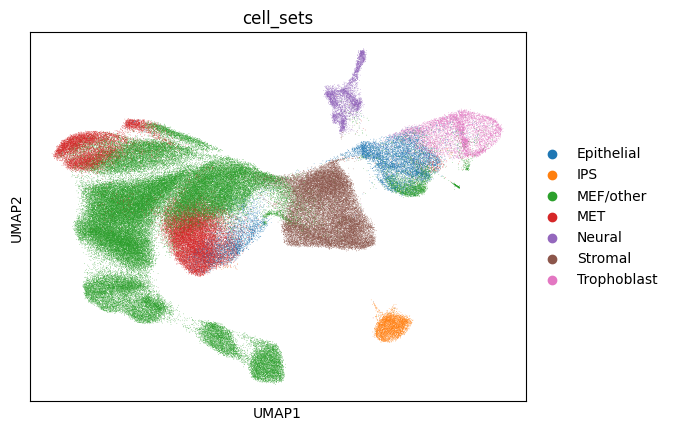

In [17]:
sc.pl.umap(adata, color="cell_sets", layer="X_force_directed")

In [28]:
adata.layers["X_log"]

<165892x1479 sparse matrix of type '<class 'numpy.float32'>'
	with 27383313 stored elements in Compressed Sparse Row format>

In [40]:
adata.obs["experimental_time"] = adata.obs["day"].astype(float)
max_exp_time = np.max(adata.obs["experimental_time"])

In [42]:
adata.obs["experimental_time"] = [i/max_exp_time for i in adata.obs["experimental_time"]]

In [45]:
np.unique(adata.obs["experimental_time"])

array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
       0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
       0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
       0.41666667, 0.44444444, 0.45833333, 0.47222222, 0.48611111,
       0.5       , 0.52777778, 0.55555556, 0.58333333, 0.61111111,
       0.63888889, 0.66666667, 0.69444444, 0.72222222, 0.75      ,
       0.77777778, 0.80555556, 0.83333333, 0.86111111, 0.88888889,
       0.91666667, 0.94444444, 0.97222222, 1.        ])

In [46]:
adata.write_h5ad( DATA_DIR / "schiebinger_et_al" / "processed" / "schiebinger_et_al.h5ad" )